In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pickle
import pathlib
import networkx as nx
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import numpy as np
from collections import Counter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.linear_model import LinearRegression


%matplotlib inline

import sys
try:
    sys.path.append('/media/nahuel-ofi/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings import *
except:
    sys.path.append('/media/nahuel/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings import *
    
    
fig_dir = '../figs'
net_dir_name = '../networks/ER'

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


## Figure 1: Order parameter for different attacks

In [3]:
max_dfs = get_max_dfs()

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice


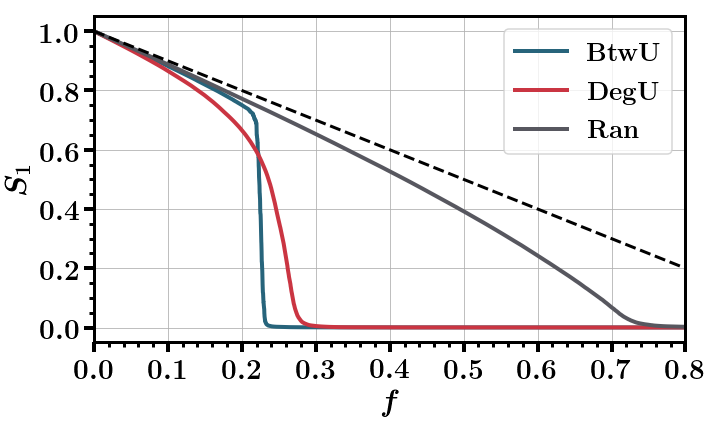

In [4]:
plot_fig1(max_dfs)

## Figure 2: Scaling properties at $f_c$

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


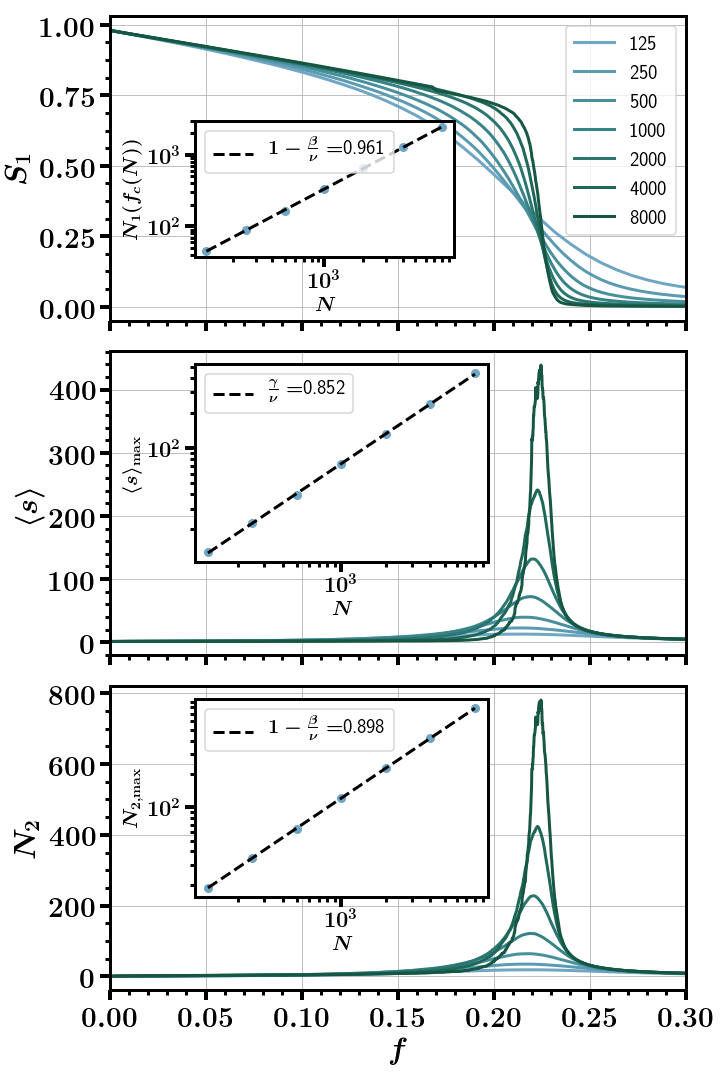

In [17]:
plot_fig2()

## Figure 3: Critical point shifting

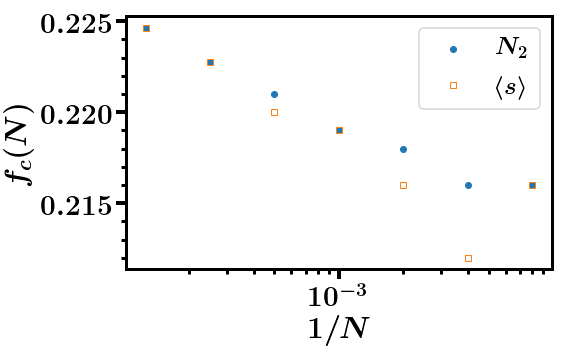

In [106]:
_N_values = N_values[:-1]
fc_values = {}
measure_fc_values = {}
attack = 'BtwU'
measures= ['meanS2', 'Nsec']
for measure in measures:
    fc_values[measure], _ = get_fc_N(dfs, attack, _N_values, measure)
    measure_fc_values[measure] = get_crit_measure_N(dfs, attack, _N_values, measure, fc_values[measure])
measure_fc_values['Sgcc'] = get_crit_measure_N(dfs, attack, _N_values, 'Sgcc', fc_values['Nsec'])   

plot_fig3(_N_values, fc_values, attack)

## Figure 4: Cluster size distribution

In [ ]:
attack = 'BtwU'
N = 8000
p = '0.0005'
f_values = ['0.1', '0.2', '0.225', '0.25', '0.3']
f_c = 0.225
all_comp_sizes_dict = {}

base_net_name = 'ER_N{}_p{}'.format(N, p)
base_net_dir_name = os.path.join(net_dir_name, base_net_name)

for f_value in f_values:
    comp_sizes_file = os.path.join(base_net_dir_name, 'comp_sizes_{}_f{}.txt'.format(attack, f_value))
    comp_sizes = np.loadtxt(comp_sizes_file, dtype=int)
    all_comp_sizes_dict[f_value] = comp_sizes
    
plot_fig4(all_comp_sizes_dict, f_c)

## Figure 5

In [103]:
attacks = ['BtwU', 'DegU', 'Ran']

N_values = [125, 250, 500, 1000, 2000, 4000, 8000, 16000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005, 0.00025]
dfs = {}
for attack in attacks:
    dfs[attack] = {}
    for N, p in zip(N_values, p_values):

        network_base = 'ER_N{}_p{}'.format(N, p)
        csv_file_name = os.path.join(net_dir_name, network_base, '{}.csv'.format(attack))    
        df = pd.read_csv(csv_file_name, index_col=0)

        dfs[attack][N] = df

def get_max_dfs():

    Sgcc_values = {}
    N = 16000
    p = 0.00025
    max_dfs = {}
    for attack in attacks:
        Ngcc_values = []

        for seed in range(100):
            network_base = 'ER_N{}_p{}'.format(N, p)
            network = network_base + '_{:05d}'.format(seed)
            attack_dir_name = os.path.join(net_dir_name, network_base, network, attack)

            full_file_name  = os.path.join(attack_dir_name, 'comp_data_' + network + '.txt')
            if not os.path.isfile(full_file_name):
                continue

            aux = np.loadtxt(full_file_name, dtype=float)
            _Ngcc_values = np.append(aux[:,0], np.repeat(np.NaN, (N-len(aux[:,0]))))

            Ngcc_values.append(_Ngcc_values)

        d = {'t': np.arange(N)/N,  'Sgcc': np.nanmean(Ngcc_values, axis=0)/N}
        df = pd.DataFrame(data=d)
        max_dfs[attack] = df
    return max_dfs
        
def plot_fig1(max_dfs):
    
    N = 16000
    ncols = 1
    nrows = 1
    fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

    ax = axes
    ax.grid(True)
    ax.set_ylabel(r'$S_1$')
    ax.set_xlabel(r'$f$')
    X = np.arange(N) / N
    Y1 = max_dfs['BtwU']['Sgcc'] 
    Y2 = max_dfs['DegU']['Sgcc']
    Y3 = max_dfs['Ran']['Sgcc']
    ax.set_xlim(0, 0.8)
    ax.set_xticks(np.arange(0, 0.9, 0.1))
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.plot(X, Y1/Y1[0], label=r'$\mathrm{BtwU}$', color='#27647b', linewidth=4)
    ax.plot(X, Y2/Y2[0], label=r'$\mathrm{DegU}$', color='#ca3542', linewidth=4)
    ax.plot(X, Y3/Y3[0], label=r'$\mathrm{Ran}$', color='#57575f', linewidth=4)
    ax.plot(X, 1 - X, color='k', linestyle='--')
    ax.legend(loc='best')

    plt.tight_layout()
    fig_name = os.path.join(fig_dir, 'percolation')
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')
    plt.show()
    
    
def get_fc_N(dfs, attack, sizes, measure):

    fcs = []
    peaks = []
    for N in sizes:
        idx = dfs[attack][N][measure].idxmax()    
        fcs.append(idx/N)
        peaks.append(dfs[attack][N][measure][idx])
    return np.array(fcs), np.array(peaks)

def get_crit_measure_N(dfs, attack, sizes, measure, fc_values):
    n_sizes = len(sizes)
    if isinstance(fc_values, float):
        fc_values = [fc_values] * n_sizes
        
    crit_values = []    
    for N, fc in zip(sizes, fc_values):
        if measure == 'Sgcc':
            crit_values.append(N*dfs[attack][N][measure][int(fc*N)])
        else:
            crit_values.append(dfs[attack][N][measure][int(fc*N)])
        
    return np.array(crit_values)  

def getLinearReg(sizes, values):
    linear_regressor = LinearRegression() 
    X = np.log(sizes).reshape(-1, 1)
    Y = np.log(values).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    return np.exp(Y_pred), slope
    
def plot_inset(_N_values, measure, ax, measure_fc_values):

    Y_pred, slope = getLinearReg(_N_values, measure_fc_values[measure])
    
    if measure == 'Nsec':
        bbox_to_anchor = (.17, .35, .51, .65)
        label = r'$1 - \frac{\beta}{\nu} = $' + '{:.3f}'.format(slope)
        ylabel = r'$N_{2,\mathrm{max}}$'

    if measure == 'meanS2':
        bbox_to_anchor = (.17, .35, .51, .65)
        label = r'$\frac{\gamma}{\nu} = $' + '{:.3f}'.format(slope)
        ylabel = r'$\langle s \rangle_{\mathrm{max}}$'
        
    if measure == 'Sgcc':
        bbox_to_anchor = (.17, .25, .45, .45)
        label = r'$1 - \frac{\beta}{\nu} = $' + '{:.3f}'.format(slope)
        ylabel = r'$N_{1}(f_c(N))$'

    
    axins = inset_axes(ax, width="100%", height="100%",
                       bbox_to_anchor=bbox_to_anchor,
                       bbox_transform=ax.transAxes)
    axins.set_xscale('log')
    axins.set_yscale('log')
    axins.tick_params(which='major', labelsize=22)
    axins.tick_params(which='minor', labelsize=22)
    axins.plot(_N_values, measure_fc_values[measure], 'o', markersize=8)    
    axins.plot(_N_values, Y_pred, '--', color='k', linewidth=3, label=label)
    axins.legend(loc='best', fontsize=20)    
    axins.set_xlabel(r'$N$', fontsize=20) 
    axins.set_ylabel(ylabel, fontsize=20)  
        
def plot_fig2():

    _N_values = N_values[:-1]
    attack = 'BtwU'
    measures= ['meanS2', 'Nsec']
    peak_values = {}
    fc_values = {}
    measure_fc_values = {}
    for measure in measures:
        fc_values[measure], peak_values[measure] = get_fc_N(dfs, attack, _N_values, measure)
        measure_fc_values[measure] = get_crit_measure_N(dfs, attack, _N_values, measure, fc_values[measure])
    measure_fc_values['Sgcc'] = get_crit_measure_N(dfs, attack, _N_values, 'Sgcc', fc_values['Nsec'])    

    palette = sns.cubehelix_palette(
        n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
    )
    plt.rc('axes', prop_cycle=cycler('color', palette))
    
    attack = 'BtwU'

    ncols = 1
    nrows = 3
    fig, axes = plt.subplots(figsize=(10*ncols, 5*nrows), ncols=ncols, nrows=nrows, sharex=True)

    for ax in axes.flatten():
        ax.set_xlim(0., 0.3)
        ax.grid(True)

    ax = axes[0]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Sgcc'], label='{}'.format(N))
    ax.set_ylabel(r'$S_1$')
    ax.legend(loc='best', fontsize=20)

    ax = axes[1]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['meanS2'])
    ax.set_ylabel(r'$\langle s \rangle $')

    ax = axes[2]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Nsec'])
    ax.set_ylabel(r'$N_2$')
    ax.set_xlabel(r'$f$')

    plot_inset(_N_values, 'Sgcc', axes[0], measure_fc_values)
    plot_inset(_N_values, 'meanS2', axes[1], measure_fc_values)
    plot_inset(_N_values, 'Nsec', axes[2], measure_fc_values)

    plt.tight_layout()
    fig_name = os.path.join(fig_dir, 'fssa_{}_draft'.format(attack))
    plt.savefig(fig_name + '.png', transparent=False)
    plt.savefig(fig_name + '.pdf', transparent=False)
    plt.show()


def plot_fig3(_N_values, fc_values, attack):
    ncols = 1
    nrows = 1
    fig, axes = plt.subplots(figsize=(8*ncols, 5*nrows), ncols=ncols, nrows=nrows)

    ax = axes
    ax.set_xscale('log')
    ax.set_xlabel(r"$1/N$") 
    ax.plot(1/np.array(_N_values), fc_values['Nsec'], 'o', color=colors[0], label=r'$N_{2}$')
    ax.plot(1/np.array(_N_values), fc_values['meanS2'], 's', color=colors[1], 
            label=r"$\langle s \rangle $", markerfacecolor='none')
    ax.set_ylabel(r'$f_c(N)$')
    ax.legend(loc='best', fontsize=24)

    plt.tight_layout()
    fig_name = os.path.join(fig_dir, 'fc_{}'.format(attack))
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')
    plt.show()
    

def plot_fig4(all_comp_sizes_dict, f_c):

    fig, ax = plt.subplots(figsize=(8, 5), ncols=1, nrows=1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$s$')
    #ax.set_xlim(0.9, np.max([np.max(elem) for elem in all_comp_sizes_dict[N].values()]))

    ax.set_ylabel(r'$P(s)$')
    for i, f_value in enumerate(f_values):
        f = float(f_value)
        Y = all_comp_sizes_dict[f_value]
        sorted_vals, ccdf = get_ccdf(Y)
        if f < f_c:
            if i == len(f_values)//2 - 1:
                ax.plot(sorted_vals, ccdf, '-.', alpha=0.9, color='#ca3542', label=r'$f < f_c$')
            else:
                ax.plot(sorted_vals, ccdf, '-.', alpha=0.7, color='#ca3542')
        elif f > f_c:
            if i == len(f_values)//2+1:
                ax.plot(sorted_vals, ccdf, '--', alpha=0.9, color='#27647b', label=r'$f > f_c$')
            else:
                ax.plot(sorted_vals, ccdf, '--', alpha=0.7, color='#27647b')

        else:
            ax.plot(sorted_vals, ccdf, '-', color='#57575f', label=r'$f = f_c$')

    legend = ax.legend(loc='best', fontsize=20)
    fig_name = os.path.join(fig_dir, 'comp_size_dist_{}'.format(attack))
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')
    plt.tight_layout()
    plt.show()
    
plot_fig4(all_comp_sizes_dict, f_c)


NameError: name 'all_comp_sizes_dict' is not defined

In [133]:
def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf

N = 8000
p = 0.0005
base_net =  'ER_N{}_p{}'.format(N, p)
f_values = [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.21, 0.215, 0.22, 0.225, 0.23,
                0.24, 0.25, 0.3, 0.35, 0.4, 0.45]

f_values = [0, 0.1, 0.175, 0.2, 0.21, 0.215, 0.22, 0.225, 0.23]

maxb_values = []
btw_dist_lin = {}
btw_dist_log = {}
sorted_values = {}
ccdfs = {}
for i, f in enumerate(f_values):
    print(f)
    file_name = "../networks/ER/" + base_net + "/btw_data_" + base_net + "_t{:.6f}.txt".format(f)
    btwSeq = np.loadtxt(file_name)

    mask = btwSeq > 0
    btwSeq = btwSeq[mask]       

    minb = min(btwSeq)
    maxb = max(btwSeq)
    maxb_values.append(maxb)
    
    meanb = np.mean(btwSeq)
    stdb = np.std(btwSeq)
    meanb2 = np.mean(btwSeq**2)

    bins = np.logspace(np.log10(minb), np.log10(maxb), 12)
    hist, bin_edges = np.histogram(btwSeq, bins=bins, density=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2
    widths = np.diff(bins)
    hist_norm = hist/widths
    hist_norm[hist_norm==0] = np.NaN
    mask = np.isfinite(hist_norm)
    btw_dist_log[f] = [bin_centers[mask], hist_norm[mask]]   
    
    bins = np.linspace(minb, maxb, 12)
    hist, bin_edges = np.histogram(btwSeq, bins=bins, density=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2
    widths = np.diff(bins)
    hist_norm = hist/widths
    hist_norm[hist_norm==0] = np.NaN
    mask = np.isfinite(hist_norm)
    btw_dist_lin[f] = [bin_centers[mask], hist_norm[mask]]   
    
    
    ccdf_name = "../networks/ER/" + base_net + "/btw_ccdf_" + base_net + "_f{:.6f}.npy".format(f)
    if os.path.isfile(ccdf_name):
        sorted_vals, ccdf = np.load(ccdf_name)
    else:
        print(ccdf_name)
        sorted_vals, ccdf = get_ccdf(btwSeq)
        np.save(ccdf_name, np.array([sorted_vals, ccdf]))        
    sorted_values[f] = sorted_vals
    ccdfs[f] = ccdf

0
0.1
0.175
0.2
0.21
0.215
0.22
0.225
0.23


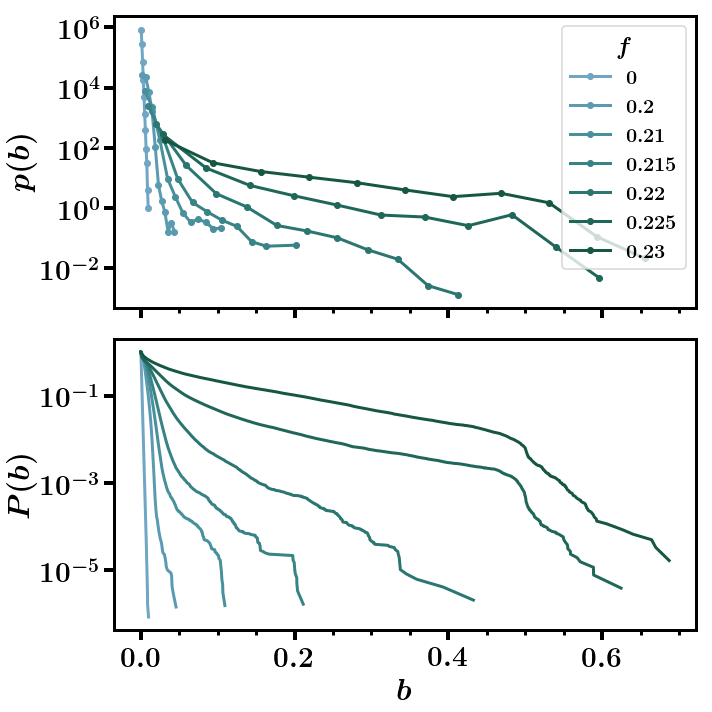

In [109]:
ncols = 1
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 5*nrows), ncols=ncols, nrows=nrows, sharex=True)
for ax in axes:
    ax.set_yscale('log')
    #ax.set_xscale('log')
    
    #ax.set_xlim(0.0, 0.04)
axes[0].set_ylabel('$p(b)$')
axes[1].set_ylabel('$P(b)$')
axes[1].set_xlabel('$b$')

f_values_plot = [0, 0.2, 0.21, 0.215, 0.22, 0.225, 0.23]
palette = sns.cubehelix_palette(
    n_colors=len(f_values_plot)+1, start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))
    

for f in f_values_plot:

    bin_centers, hist_norm = btw_dist_lin[f]
    axes[0].plot(bin_centers, hist_norm, 'o-', label=r'${{{}}}$'.format(f))
    
    axes[1].plot(sorted_values[f], ccdfs[f], '-', label=r'${{{}}}$'.format(f))

legend = axes[0].legend(loc='best', title=r'$f$', fontsize=20)
plt.setp(legend.get_title(),fontsize=24)

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'btw_dist')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

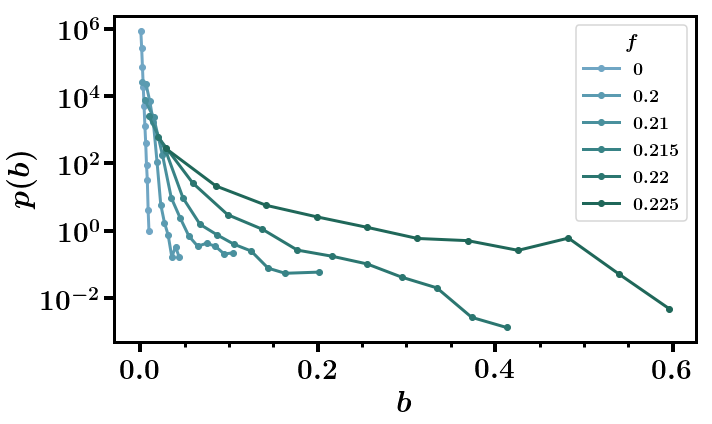

In [121]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax = axes
ax.set_yscale('log')
ax.set_ylabel('$p(b)$')
ax.set_xlabel('$b$')

f_values_plot = [0, 0.2, 0.21, 0.215, 0.22, 0.225]
palette = sns.cubehelix_palette(
    n_colors=len(f_values_plot)+1, start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

for f in f_values_plot:
    bin_centers, hist_norm = btw_dist_lin[f]
    ax.plot(bin_centers, hist_norm, 'o-', label=r'${{{}}}$'.format(f))

legend = ax.legend(loc='best', title=r'$f$', fontsize=20)
plt.setp(legend.get_title(),fontsize=20)

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'btw_dist')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

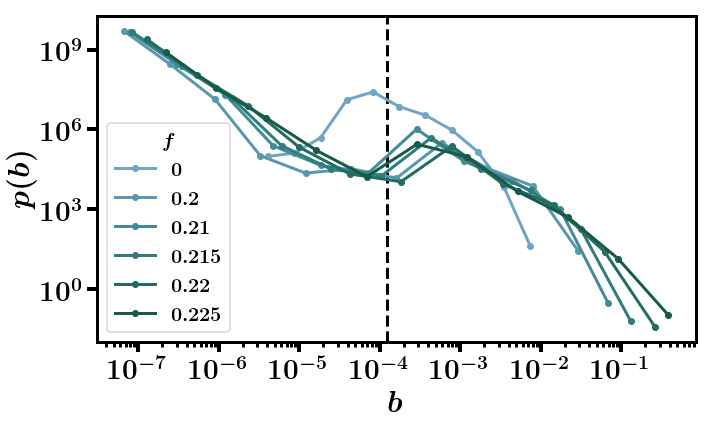

In [131]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax = axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$p(b)$')
ax.set_xlabel('$b$')

ax.axvline(1/8000, linestyle='--', color='k')

f_values_plot = [0, 0.2, 0.21, 0.215, 0.22, 0.225]
palette = sns.cubehelix_palette(
    n_colors=len(f_values_plot)+1, start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

for f in f_values_plot:
    bin_centers, hist_norm = btw_dist_log[f]
    ax.plot(bin_centers, hist_norm, 'o-', label=r'${{{}}}$'.format(f))

legend = ax.legend(loc='best', title=r'$f$', fontsize=20)
plt.setp(legend.get_title(),fontsize=20)

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'btw_dist_log')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

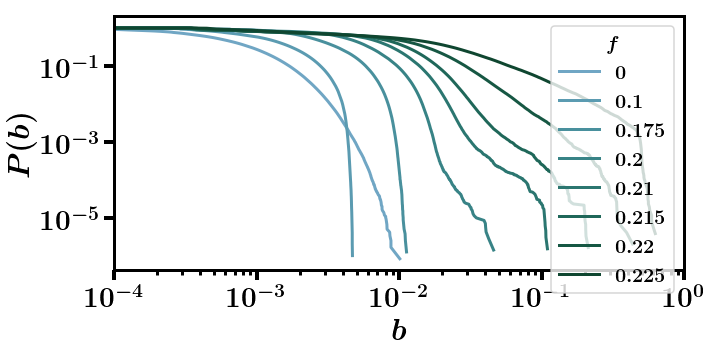

In [135]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(10*ncols, 5*nrows), ncols=ncols, nrows=nrows, sharex=True)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10E-5, 1)

ax.set_ylabel('$P(b)$')
ax.set_xlabel('$b$')

f_values_plot = [0, 0.1, 0.175, 0.2, 0.21, 0.215, 0.22, 0.225]
palette = sns.cubehelix_palette(
    n_colors=len(f_values_plot)+1, start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))
    

for f in f_values_plot:
    ax.plot(sorted_values[f], ccdfs[f], '-', label=r'${{{}}}$'.format(f))

legend = ax.legend(loc='best', title=r'$f$', fontsize=20)
plt.setp(legend.get_title(),fontsize=20)

plt.tight_layout()
plt.show()

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


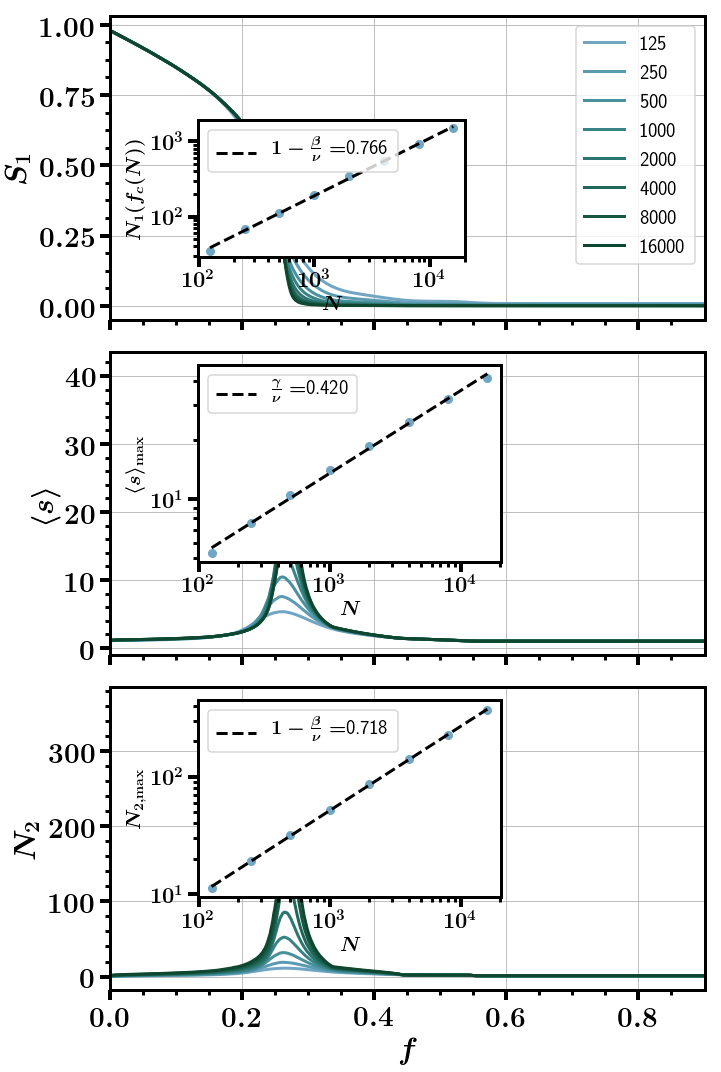

In [145]:
def plot_fig2_ran():

    _N_values = N_values
    attack = 'DegU'
    measures= ['meanS2', 'Nsec']
    peak_values = {}
    fc_values = {}
    measure_fc_values = {}
    for measure in measures:
        fc_values[measure], peak_values[measure] = get_fc_N(dfs, attack, _N_values, measure)
        measure_fc_values[measure] = get_crit_measure_N(dfs, attack, _N_values, measure, fc_values[measure])
    measure_fc_values['Sgcc'] = get_crit_measure_N(dfs, attack, _N_values, 'Sgcc', fc_values['Nsec'])    

    palette = sns.cubehelix_palette(
        n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
    )
    plt.rc('axes', prop_cycle=cycler('color', palette))

    ncols = 1
    nrows = 3
    fig, axes = plt.subplots(figsize=(10*ncols, 5*nrows), ncols=ncols, nrows=nrows, sharex=True)

    for ax in axes.flatten():
        ax.set_xlim(0., 0.9)
        ax.grid(True)

    ax = axes[0]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Sgcc'], label='{}'.format(N))
    ax.set_ylabel(r'$S_1$')
    ax.legend(loc='best', fontsize=20)

    ax = axes[1]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['meanS2'])
    ax.set_ylabel(r'$\langle s \rangle $')

    ax = axes[2]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Nsec'])
    ax.set_ylabel(r'$N_2$')
    ax.set_xlabel(r'$f$')

    plot_inset(_N_values, 'Sgcc', axes[0], measure_fc_values)
    plot_inset(_N_values, 'meanS2', axes[1], measure_fc_values)
    plot_inset(_N_values, 'Nsec', axes[2], measure_fc_values)

    plt.tight_layout()
    plt.show()
    

plot_fig2_ran()